b:  35.654780826589324
[(143, 119), (134, 175), (161, 164), (170, 146), (183, 178), (252, 160), (280, 122), (308, 193), (318, 160), (276, 191)]
[[183. 178.]
 [252. 160.]]


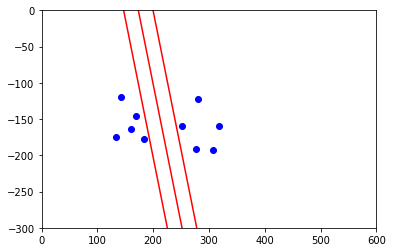

In [3]:
import pygame 
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
pygame.init()
    
scr=pygame.display.set_mode((600,400))
scr.fill((255,255,255))
pygame.display.update()
    
def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
    
clock=pygame.time.Clock()
FPS=60
    
xxx=[]
yyy=[]
    
points=[]
clusters=[]
p=True
while p:
    for i in pygame.event.get():
        if i.type==pygame.QUIT:
            p=False
        if i.type==pygame.MOUSEBUTTONDOWN:
            if i.button==1:
                pygame.draw.circle(scr, (255,0,0), i.pos, 5)
                points.append(i.pos)
                clusters.append(0)
        if i.type==pygame.MOUSEBUTTONDOWN:
            if i.button==3:
                pygame.draw.circle(scr, (0,255,0), i.pos, 5)
                points.append(i.pos)
                clusters.append(1)
        if i.type==pygame.MOUSEBUTTONDOWN:
            if i.button==2:
                scr.fill((255,255,255))
                points=[]
                clusters=[]
        if i.type==pygame.KEYDOWN:
            if i.key==pygame.K_r:
                algr=svm.SVC(C=1.0, kernel='linear')
                algr.fit(points,clusters)
                w=algr.coef_[0]
                    
                a = -w[0] / w[1]
                xx = np.linspace(100,500,600)
                yy = (a * xx - algr.intercept_[0] / w[1])
                b=10000
                point=[]
                    
                for j in range(0, len(points)):
                    for i in range(0,len(yy)):
                        if(b>dist(points[j][0],points[j][1],xx[i],yy[i])):
                            b=dist(points[j][0],points[j][1],xx[i],yy[i])
                            point=[j,i]
                            
                print('b: ',b) 
                print(points)
                print(algr.support_vectors_)
                pygame.draw.line(scr,(0,255,255),(xx[0],yy[0]), (xx[len(xx)-1], yy[len(yy)-1]), 2)
                pygame.draw.line(scr,(0,255,255),(xx[0]-b,yy[0]-b), (xx[len(xx)-1]-b, yy[len(yy)-1]-b), 2)
                pygame.draw.line(scr,(0,255,255),(xx[0]+b,yy[0]+b), (xx[len(xx)-1]+b, yy[len(yy)-1]+b), 2)
                    
                plt.axis([0.0, 600.0, -300.0, 0.0])
                for  i in range(0,len(points)):
                    plt.scatter(points[i][0],-points[i][1],c='b')
                plt.plot(xx,-yy,c='r')
                plt.plot(xx+b,-(yy+b),c='r')
                plt.plot(xx-b,-(yy-b),c='r')
                plt.show()
                    
    clock.tick(FPS)
    pygame.display.update()